# 381 Project Notebook
##### By Gabriel Menescal, Taylor Merry, and Justin Ngo

Should you choose to test this for yourself, head over to the *User Input* section and change it there.

Activity options are: ['Jog', 'Lifting', 'Swimming', 'Biking', 'Basketball', 'Walk', 'Hot Yoga', 'Treadmill/Bike', 'Hike', 'Body-Weight Workouts', 'Rock Climbing', 'Martial Arts', 'Go for a drive', 'Watch a movie', 'Watch tv', 'Watch Videos', 'Nap', 'Eat a healthy snack', 'Read', 'Video Games', 'Draw', 'Hang with Pets', 'Massage', 'Spa', 'Study Break', 'Puzzles', 'Social Media', 'Singing', 'Playing an Instrument', 'Daydream', 'Visualization', 'Bars', 'Clubs', 'Meeting an old friend', 'Talking to Family', 'Sports game', 'Museum', 'Sight seeing', 'Meditation', 'Music Therapy', 'Breathing exercises', 'Muscle Relaxation', 'Journaling', 'Yoga', 'Practicing gratefulness', 'Self project', 'Research', 'Search for jobs', 'Learn something new', 'Plan your day/week', 'Look into your future plans', 'Read Textbook', 'Cooking']

### User Input

Here a user inputs the activities that he or she enjoys practicing and activities that he or she does not want to do or cannot do

The user also inputs the amount of free periods they have throughout the day.

In [153]:
user_activities = ['Watch Videos', 'Daydream', 'Music Therapy'] # Edit this to input your own activities
#exclude_activities = ['Jog', 'Basketball'] # Edit this to change activities you don't want to do or cannot do 
exclude_activities = []
exclude_activities = set(exclude_activities)
user_timings = { # Edit the numbers to indicate how many free periods of a certain duration you have throughout a day
    "<15 min": 1,
    "15 to 30": 3,
    "30 to 60": 2,
    "hour+": 1
}
slots = user_timings["<15 min"] + user_timings["15 to 30"] + user_timings["30 to 60"] + user_timings["hour+"]

### Imports

First we import the packages we will be using and then we import our csv into a SFrame

In [154]:
import turicreate as tc
import math
import operator
import random
import numpy as np
import matplotlib.pyplot as plt

In [155]:
activity_data = tc.SFrame('activity.csv')
activity_data

Finished parsing file /Users/gabrielmenescal/Documents/MATH381/Prjoect/activity.csv

Parsing completed. Parsed 53 lines in 0.039282 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/gabrielmenescal/Documents/MATH381/Prjoect/activity.csv

Parsing completed. Parsed 53 lines in 0.013128 secs.

Activity,Group,<15 min,15 to 30,30 to 60,hour+,Socialization,Outside home,Weather Permitting
Jog,Exercise,1,1,1,1,0,1,1
Lifting,Exercise,0,1,1,1,0,1,0
Swimming,Exercise,0,0,1,1,0,1,0
Biking,Exercise,1,1,1,1,0,1,1
Basketball,Exercise,0,1,1,1,1,1,0
Walk,Exercise,1,1,1,1,0,1,1
Hot Yoga,Exercise,0,1,1,0,1,1,0
Treadmill/Bike,Exercise,1,1,1,1,0,1,0
Hike,Exercise,0,0,0,1,1,1,1
Body-Weight Workouts,Exercise,1,1,1,1,0,1,0


### Parse data

Here we separate our data into two separate sets, one of activities and their features and the other of users and activities they partake in.

Extracting activity features

In [156]:
activity_columns = ['Activity'] + activity_data.column_names()[6:26]
activities_features = activity_data.select_columns(activity_columns)
activities_features

Activity,Socialization,Outside home,Weather Permitting,People Interaction,Nature,Healthy Physically
Jog,0,1,1,1,1,1
Lifting,0,1,0,1,0,1
Swimming,0,1,0,1,0,1
Biking,0,1,1,1,1,1
Basketball,1,1,0,1,0,1
Walk,0,1,1,1,1,1
Hot Yoga,1,1,0,1,0,1
Treadmill/Bike,0,1,0,0,0,1
Hike,1,1,1,1,1,1
Body-Weight Workouts,0,1,0,1,0,1


Extracting user data

In [157]:
user_columns = ['Activity'] + activity_data.column_names()[26:]
user_data = activity_data.select_columns(user_columns)
user_data

Activity,Taylor,Justin,Gabriel,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Jog,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1
Lifting,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0
Swimming,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
Biking,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0
Basketball,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
Walk,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1
Hot Yoga,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Treadmill/Bike,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
Hike,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1
Body-Weight Workouts,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Modelling

We define the cosine similarity function that we will be using to model the similarity between different activities

We define the jaccard similarity which we will use to model the similarity between different users

In [158]:
def cosine(u, v):
    '''
    Given two vector inputs u, v compute the cosine similarity between the two vectors
    '''
    xx, xy, yy = 0, 0, 0
    for z in u:
        if type(u[z]) is str: # skip first two elements which are strings
            continue
        xx += u[z] * u[z]
        xy += u[z] * v[z]
        yy += v[z] * v[z]
    return xy/math.sqrt(xx*yy)

In [159]:
def jaccard(u, v):
    return len(u.intersection(v)) / len(u.union(v))

### Computation

For each activity we compute its cosine similarity to all other activities and order the similarities from most similar (largest similarity score) to least similar (lowest similarity score), and for the user input we calculate how similar he or she is to the pool of users in the data set

First, we compute the cosine similarities between activities

In [160]:
activity_similarities = {} # dictionary for computed similarity values
for row in activities_features:
    if row['Activity'] in exclude_activities:
        continue
    activity_similarities[row['Activity']] = {}
    for i in range(len(activities_features)):
        if row['Activity'] == activities_features[i]['Activity'] or activities_features[i]['Activity'] in exclude_activities:
            continue
        activity_similarities[row['Activity']][activities_features[i]['Activity']] = cosine(row, activities_features[i])

In [161]:
activity_similarities; # remove semi-colon to display

In [162]:
ordered_similarities = {}
for activity in activity_similarities:
    ordered_similarities[activity] = sorted(activity_similarities[activity].items(), key=operator.itemgetter(1), reverse=True)

In [163]:
ordered_similarities; # remove semi-colon to display

Second, we compute the jaccard similarity betweeen the current user's input and the other user data from our dataset

In [164]:
user_similarities = []
for cname in user_data.column_names()[1:]:
    temp1 = set(user_activities)
    temp2 = set(user_data[user_data[cname] == 1]['Activity'])
    user_similarities.append(jaccard(temp1, temp2))
sorted_indexes = [index[0] for index in sorted(enumerate(user_similarities), key=lambda x:x[1], reverse=True)]
user_similarities = sorted(user_similarities, reverse=True)
# print(user_similarities) # uncommment print to display

Third, we establish the activity suggestion pool

In [177]:
num_users_to_utilize = 4

In [178]:
activity_pool = set([])
for i in range(num_users_to_utilize):
    activity_pool = activity_pool.union(set(user_data[(user_data.select_column(user_data.column_names()[sorted_indexes[i] + 1]) == 1)]['Activity']).difference(set(user_activities)))

activity_pool.difference_update(exclude_activities)


Fourth, we rank the activities in the pool

In [179]:
ranked_activity_pool = []
for activity in activity_pool:
    curr_max = -1;
    for user_activity in user_activities:
        if activity_similarities[user_activity][activity] > curr_max:
            curr_max = activity_similarities[user_activity][activity]
    ranked_activity_pool.append([activity, curr_max])
ranked_activity_pool = sorted(ranked_activity_pool, key=operator.itemgetter(1), reverse=True)

In [180]:
ranked_activity_pool

[['Watch tv', 1.0],
 ['Watch a movie', 1.0],
 ['Video Games', 0.9486832980505138],
 ['Nap', 0.9354143466934853],
 ['Eat a healthy snack', 0.9354143466934853],
 ['Muscle Relaxation', 0.875],
 ['Study Break', 0.8571428571428571],
 ['Look into your future plans', 0.7777777777777778],
 ['Read', 0.7777777777777778],
 ['Social Media', 0.769800358919501],
 ['Puzzles', 0.7559289460184544],
 ['Read Textbook', 0.7559289460184544],
 ['Body-Weight Workouts', 0.75],
 ['Plan your day/week', 0.7378647873726218],
 ['Self project', 0.7378647873726218],
 ['Search for jobs', 0.7378647873726218],
 ['Talking to Family', 0.7071067811865476],
 ['Learn something new', 0.7071067811865476],
 ['Jog', 0.6708203932499369],
 ['Walk', 0.6708203932499369],
 ['Treadmill/Bike', 0.6681531047810609],
 ['Research', 0.5892556509887896],
 ['Cooking', 0.5555555555555556],
 ['Biking', 0.5330017908890261],
 ['Lifting', 0.5],
 ['Meeting an old friend', 0.43301270189221935],
 ['Basketball', 0.42640143271122083],
 ['Hike', 0.3354

Fifth, we filter out any activities that aren't amoung the top ten similar activities from those specified by the user's input

In [181]:
for activity in ranked_activity_pool:
    found = False
    if not found:
        for user_activity in user_activities:
            for i in range(10):
                if ordered_similarities[user_activity][i][0] == activity[0]:
                    found = True
                    break
            if found:
                break
    if not found:
        ranked_activity_pool.remove(activity)

In [182]:
ranked_activity_pool

[['Watch tv', 1.0],
 ['Watch a movie', 1.0],
 ['Video Games', 0.9486832980505138],
 ['Nap', 0.9354143466934853],
 ['Eat a healthy snack', 0.9354143466934853],
 ['Muscle Relaxation', 0.875],
 ['Study Break', 0.8571428571428571],
 ['Look into your future plans', 0.7777777777777778],
 ['Read', 0.7777777777777778],
 ['Social Media', 0.769800358919501],
 ['Read Textbook', 0.7559289460184544],
 ['Plan your day/week', 0.7378647873726218],
 ['Self project', 0.7378647873726218],
 ['Search for jobs', 0.7378647873726218],
 ['Learn something new', 0.7071067811865476],
 ['Walk', 0.6708203932499369],
 ['Research', 0.5892556509887896],
 ['Biking', 0.5330017908890261],
 ['Meeting an old friend', 0.43301270189221935],
 ['Hike', 0.33541019662496846],
 ['Clubs', 0.29814239699997197],
 ['Sports game', 0.2721655269759087]]

### Generate Suggestions

Using the finalized pool of activities, we randomize the order and suggest a number of activities equal to the number of periods of a certain duration plus an extra so that there is some variety

In [183]:
activity_per_period = {
    "<15 min": [],
    "15 to 30": [],
    "30 to 60": [],
    "hour+": []
}

final_pool = [i[0] for i in ranked_activity_pool]
if slots + 4 < len(final_pool):
    randomized_pool = random.sample(final_pool, len(final_pool))
    for activity in randomized_pool:
        if len(activity_per_period["<15 min"]) < user_timings["<15 min"] + 1 and activity_data[activity_data['Activity'] == activity]['<15 min'][0] == 1:
            activity_per_period["<15 min"].append(activity)
        elif len(activity_per_period["15 to 30"]) < user_timings["15 to 30"] + 1 and activity_data[activity_data['Activity'] == activity]['15 to 30'][0] == 1:
            activity_per_period["15 to 30"].append(activity)
        elif len(activity_per_period["30 to 60"]) < user_timings["30 to 60"] + 1 and activity_data[activity_data['Activity'] == activity]['30 to 60'][0] == 1:
            activity_per_period["30 to 60"].append(activity)
        elif len(activity_per_period["hour+"]) < user_timings["hour+"] + 1:
            activity_per_period["hour+"].append(activity)
else: # fewer activities in pool relative to available slots
    count = 0
    while len(activity_per_period["<15 min"]) + len(activity_per_period["15 to 30"]) + len(activity_per_period["30 to 60"]) + len(activity_per_period["hour+"]) < slots and count < 10:
        for period in activity_per_period:
            randomized_pool = random.sample(final_pool, len(final_pool))
            for activity in randomized_pool:
                if len(activity_per_period["<15 min"]) < user_timings["<15 min"] and activity_data[activity_data['Activity'] == activity]['<15 min'][0] == 1:
                    activity_per_period["<15 min"].append(activity)
                elif len(activity_per_period["15 to 30"]) < user_timings["15 to 30"] and activity_data[activity_data['Activity'] == activity]['15 to 30'][0] == 1:
                    activity_per_period["15 to 30"].append(activity)
                elif len(activity_per_period["30 to 60"]) < user_timings["30 to 60"] and activity_data[activity_data['Activity'] == activity]['30 to 60'][0] == 1:
                    activity_per_period["30 to 60"].append(activity)
                elif len(activity_per_period["hour+"]) < user_timings["hour+"]:
                    activity_per_period["hour+"].append(activity) 
        count += 1
activity_per_period


{'<15 min': ['Biking', 'Study Break'],
 '15 to 30': ['Video Games', 'Research', 'Walk', 'Read'],
 '30 to 60': ['Social Media', 'Search for jobs', 'Self project'],
 'hour+': ['Watch a movie', 'Clubs']}

### Measurement of Accuracy

Here we test differnt hyper-parameters and measure the accuracy of each to determine which we should use

In [172]:
all_activities_set = set(activities_features['Activity'])
num_correct_over_all_tests = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # where we record results
sum_M_over_all_tests = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

For each user we create a random subset of 10 activities and extra them as possibilities. For a given subset we set M as the number of activities in the subset that the user does. Then use the remaining 43 activities to compute the new jaccard similarities. Determine activity suggestion pool and compute the final rankings using cosine similarity. Take the top M results and compare to original extracted M,

In [642]:
for num in range(100): # repeat 100 times
    for k in range(1,11): # range k from 1 to 10
        for user in user_data.column_names()[1:]: # for each of the users in our data set
            p = np.random.permutation(53)[:10] # random order of 0 to 53, take first 10 so we can eliminate 10 activities
            randoms = [activities[p[x]]['Activity'] for x in range(10)] # rand activities
            M = 0
            for i in p:
                M += user_data[i][user] # count M
            remaining_activities = all_activities_set.difference(set(randoms)) # set of remaining activities
            pre_test_set = set(user_data[user_data[user] == 1]['Activity']) # current user under consideration prior to activity removal
            test_user_activities = pre_test_set.difference(set(randoms)) # remove any activities among the 10 that the user does

            test_user_similarities = [] # store similarities
            for cname in user_data.column_names()[1:]: # compute new jaccard similarities
                comparison_user = set(user_data[user_data[cname] == 1]['Activity']).intersection(remaining_activities)  # user being compared to is old minus the removed activities
                test_user_similarities.append(jaccard(test_user_activities, comparison_user.difference(set(randoms)))) # compute jaccard
            test_sorted_indexes = [index[0] for index in sorted(enumerate(test_user_similarities), key=lambda x:x[1], reverse=True)] # enumerated list of sorted indexes so that we can get the original position of the user in the new sorted jaccard list
            test_user_similarities = sorted(test_user_similarities, reverse=True) # jaccard sims ordered from most similar to least

            test_num_users_to_utilize = 3
            test_activity_pool = set([]) # use the first k users to form activity pool
            for i in range(0, test_num_users_to_utilize + 1): # go to +1 because self comparison doesn't add anything and is always jaccard 1
                test_activity_pool = test_activity_pool.union((set(user_data[(user_data.select_column(user_data.column_names()[test_sorted_indexes[i] + 1]) == 1)]['Activity']).intersection((all_activities_set.difference(test_user_activities)))))

            test_ranked_activity_pool = [] # associate each activity to its highest similarity score
            for test_activity in test_activity_pool:
                test_curr_max = -1;
                for test_user_activity in test_user_activities:
                    if test_activity == test_user_activity:
                        continue
                    if activity_similarities[test_user_activity][test_activity] > curr_max:
                        test_curr_max = activity_similarities[test_user_activity][test_activity]
                test_ranked_activity_pool.append([test_activity, test_curr_max])
            test_ranked_activity_pool = sorted(test_ranked_activity_pool, key=operator.itemgetter(1), reverse=True) # arrange activites in descending order of sim score
            test_final_set = set([i[0] for i in test_ranked_activity_pool][0:M]) # pull out the first M
            test_correct = len(test_final_set.intersection(pre_test_set.intersection(randoms))) # check for number correct
            num_correct_over_all_tests[k - 1] += test_correct # record
            sum_M_over_all_tests[k - 1] += M # record

In [175]:
print(num_correct_over_all_tests)
print(sum_M_over_all_tests)

[2653, 2710, 2635, 2700, 2711, 2658, 2646, 2711, 2648, 2654]
[9862, 9995, 9862, 9890, 10062, 9949, 9834, 10006, 9894, 9861]


In [184]:
x = np.array(num_correct_over_all_tests)
y = np.array(sum_M_over_all_tests)
result = list(x / y)
print(max(result))
print("optimal k = ",result.index(max(result)) + 1)

0.2730030333670374
optimal k =  4


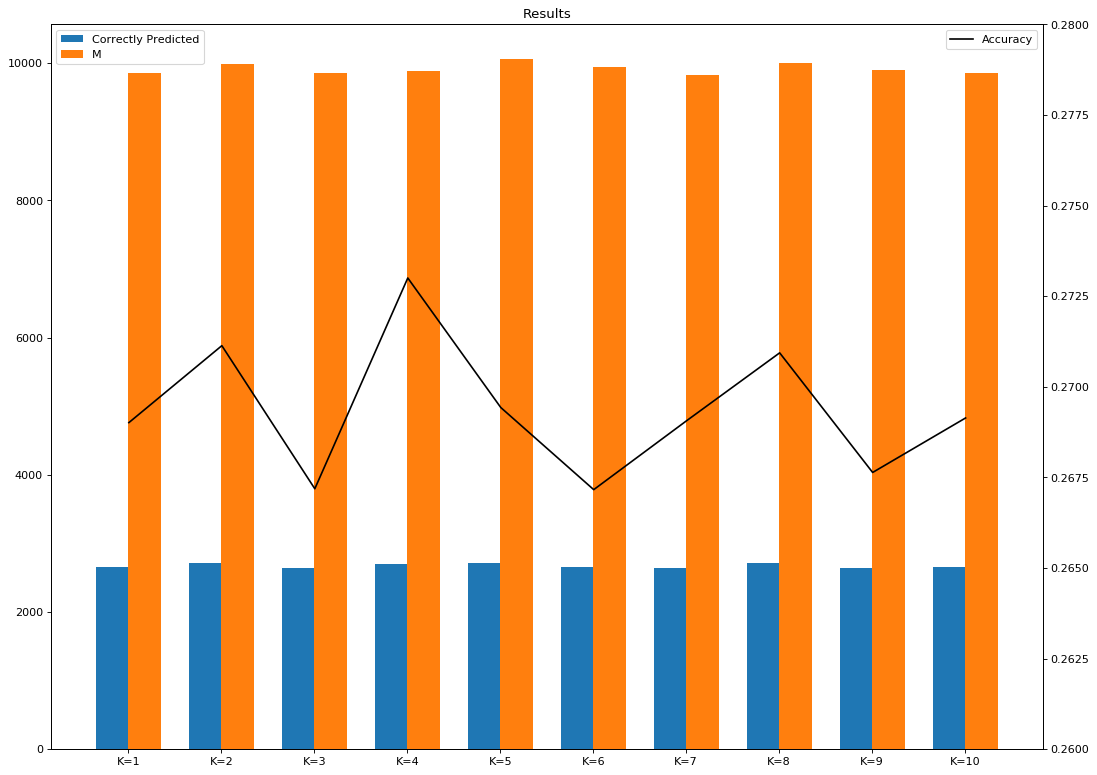

In [185]:
k = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
N = 10
fig, ax = plt.subplots(figsize=(16,12), dpi=80)

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, num_correct_over_all_tests, width, bottom=0)
p2 = ax.bar(ind + width, sum_M_over_all_tests, width, bottom=0)

ax.set_title('Results')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6', 'K=7', 'K=8', 'K=9', 'K=10'))
ax.legend((p1[0], p2[0]), ('Correctly Predicted', 'M'), loc=2)
ax.autoscale_view()

x = k - 0.82
y = np.array(result)
ax2 = plt.twinx()
ax2.plot(x, y, color='k', label='Accuracy')
ax2.set_ylim(0.26, 0.28)
ax2.legend('Accuracy')
ax2.legend(loc=1)

plt.show()